# Week 4 Section 1 -
## Video: From Asset Management to Asset-Liability Management

### Funding ratio
In [asset-liability management](https://www.investopedia.com/terms/a/asset-liabilitymanagement.asp) we measure the ratio between asset values and [liability values](https://www.investopedia.com/articles/investing/041213/examples-assetliability-management.asp).

*Funding ratio* measures the assets relative to the liabilities. If it is equal to 100%, it means that assets are sufficient to cover liabilities.

$$F_t= \frac{A_t}{L_t}$$

- $F_t$: funding ratio
- $A_t$: asset values
- $L_t$: liability values

### Surplus

The *surplus* $S_t$ is the difference between assets $A_t$ and liability values $L_t$.

$$S_t=A_t-L_t$$

**Question:** Consider a pension fund that has a 50%-50% stock/bond allocation. Assume that equity markets go down by 5%, bond markets go down by 10%, and further assume that the liability value goes down by 8%. Is the funding ratio of the pension plan increasing or decreasing? 

**Answer:** Change in return: $(0.5*-5\%+0.5*-10\%) = -7.5\%$. Change in liability value: $-8\%$. The funding ratio increases.

## Video: Lab Session - Present Values, liabilities and funding ratio
This lab session video introduces some equations.

### The present value of future liabilities
We need the present value of future liabilities to compute the funding ratio (see [Funding ratio](#Funding-ratio)).

In order to compute the present value, we need to discount the amount of the liability based on the relevant interest rate derived from the yield curve. For simplicity, we'll assume that the yield curve is flat, and so the interest rate is the same for all horizons. The present value of a set of liabilities $L$ is given by:

$$ PV(L) = \sum_{i=1}^{k} B(t_i) L_i$$

- $\mathit{PV}(L)$: present value of a set of liabilities $L$
- $k$: the number of liabilities
- $B(t_i)$: the price of a [pure discount bond](https://www.nasdaq.com/glossary/p/pure-discount-bond) that pays 1 dollar at time $t_i$
- $L_i$: liability that is due at time $t_i$

If we assume the yield curve is flat and the annual rate of interest is $r$ then $B(t)$ is given by

$$B(t) = \frac{1}{(1+r)^t}$$

This means that after $t$ years the bond (that now costs $B_t$) will pay $1$ dollar:

$$B(t)(1+r)^t = 1$$

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

In [2]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays a dollar at time t, given the interest rate r.
    """
    return (1+r)**(-t)

discount(10, 0.03)

0.7440939148967249

In [3]:
def pv(l, r):
    """
    Compute the present value of a sequence of liabilities
    l is indexed by the time, and the values are the amounts of each liability
    returns the present value of the sequence
    """
    dates = l.index
    discounts = discount(dates, r)
    return (discounts * l).sum()

In [4]:
liabilities = pd.Series(data = [1, 1.5, 2, 2.5], index = [3, 3.5, 4, 4.5])
liabilities

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

In [5]:
pv(liabilities, 0.03)

6.233320315080045

In [6]:
liabilities.sum() #Current I owe 7.million in future but NPV I owe 6.2million now as liability. If I have 6.2m now, interest rate 3% means 7m in future.

7.0

In [7]:
def funding_ratio(assets, liabilities, r):
    """"
    Computes the funding ratio of some assets given liabilities and interest rate
    """
    return assets/pv(liabilities, r)

In [8]:
funding_ratio(5, liabilities, 0.03)

0.8021407126958777

In [9]:
funding_ratio(5, liabilities, 0.05)

0.8649082768407927

We can see that your current value of assets at 5% interest rate can only pay 86% of liabilities in future. Bad news

In [10]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_funding_ratio(assets, r):
    fr = funding_ratio(assets, liabilities, r)
    print(f'{fr*100:.2f}%')
    
controls = widgets.interactive(show_funding_ratio, 
                              assets = widgets.IntSlider(min=1, max=10, step=1, value=5),
                              r = (0, 0.2, 0.01))
display(controls)

interactive(children=(IntSlider(value=5, description='assets', max=10, min=1), FloatSlider(value=0.1, descript…

## Video: Liability hedging portfolios

### Hedging = cash-flow matching
*Liability-hedging portfolios (LHP)* or *Goal-hedging portfolios (GHP)* are portfolios with payoffs (cash-flows) matching the date and nominal amount of liability/goal payments.

Standard [bonds](https://www.investopedia.com/terms/b/bond.asp) are not suited for retirement pay outs, because the value is payed out in one lump sum. 

**Question:** What is the safe liability-hedging asset for an investor that has a liability defined as a single inflation-indexed payment to be made in 10 years from now?

- 3 month [T-Bills](https://www.investopedia.com/terms/t/treasurybill.asp)?
- 10 year [T-Bond](https://www.investopedia.com/terms/t/treasurybond.asp)?
- [Inflation-linked](https://www.investopedia.com/articles/bonds/09/inflation-linked-bonds.asp) [pure discount](https://www.investopedia.com/terms/p/pure_discount_instrument.asp) (zero coupon) bond with a 10 year duration

**Answer:**

- *T-bills*: This should not be selected. If interest rates go down, the value of short-term bonds will increase moderately, while the value of the long-dated liabilities will increase significantly. 

- *T-bond*: This should not be selected. The duration of a coupon-paying 10 year bond will be strictly lower than 10. As a result, the bond value will increase less than the liabilities in case of a decrease in interest rates. Besides, the 10-year T-Bond offers no protection with respect to increases in inflation. 

- *Inflation linked bond*: Correct. For this investor, the liability-hedging portfolio is a 10Y inflation-linked pure discount bond.

### Factor exposure matching
We would like bonds with payouts that match our liability payments. That would give perfect cash-flow matching.  This is not practical and we can use *factor exposure matching* instead.

**Question:** What is the safe liability-hedging asset for a 45Y old investor preparing for retirement at age 65.

- 3 month T-Bills? 
- 20-year inflation-linked pure discount bond?
- Deferred inflation-linked annuity with a 20 years deferral period?

**Answer:**

- *3 month T-Bills:* This should not be selected 
If interest rates go down, the value of short-term bonds will increase moderately, while the value of the long-dated liabilities, given by replacement income, will increase significantly.

- *20-year inflation-linked pure discount bond:* This should not be selected 
The 20-year pure discount bond will pay a cash-flow when the investor reaches retirement at age 65, but the investor needs to receive replacement income cash-flows throughout retirement, not at retirement date.  

- *Deferred inflation-linked annuity with a 20 years deferral period?:* A deferred inflation-linked annuity with a 20 year deferral period will start paying cash flows when the investor reaches age 65, and will pay replacement income cash-flow as long as the investor is alive. This make it the perfect safe retirement asset. 

These questions cannot be answered using the information learned in the lectures!

## Video: Lab Session-CIR Model and cash vs ZC bonds
### CIR Model
The Cox Ingersoll Ross Model (CIR) is used to simulate changes in interest rate. It is a mean reverting model.

$$ dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t} $$

- $dr_t$: small change in interest rate
- $a$: the speed of reversion to the mean
- $b$: long term mean of the interest rate
- $r_t$: current interest rate 
- $d_t$: a small amount of time
- $\sigma {\sqrt  {r_{t}}}\,dW_{t}$: random component
  - $\sigma$: the volatility, which acts as a scaling factor
  - $\sqrt{r_t}$: prevents negative interest rates
  - $dW_t$: a random normally distributed number ('the shock')

### Short rate
The *short rate* is the instantaneous interest rate that you get for a very small amount of time. To annualize this rate, we need to [compound](https://www.investopedia.com/terms/c/compoundinterest.asp) it.

As $N \rightarrow \infty$ we get the generalization:

If we compound every $1/N$ part of a year we get:

$$(1+\frac{r}{N})^N$$

$$ 1+r_{annual} = e^{r_{inst}}$$
$$ r_{annual} = e^{r_{inst}} -1 $$
$$ r_{inst} = {ln}(1+r_{annual})$$

- $r_{annual}$: annualized interest rate
- $r_{inst}$: instantaneous (or short) rate
- $e^{r_{inst}}$: $e$ to the power of the short rate

In [11]:
def inst_to_ann(r):
    """
    Converts short rate to an annualized rate
    """
    return np.expm1(r)

def ann_to_inst(r):
    """
    Converts an annualized rate to a short rate
    """
    return np.log1p(r)

In [12]:
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR model for interest rates
    """
    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year

    num_steps = int(n_years*steps_per_year)+1
    shock = np.random.normal(0, scale = np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)

    return pd.DataFrame(data = inst_to_ann(rates), index=range(num_steps))

<Axes: >

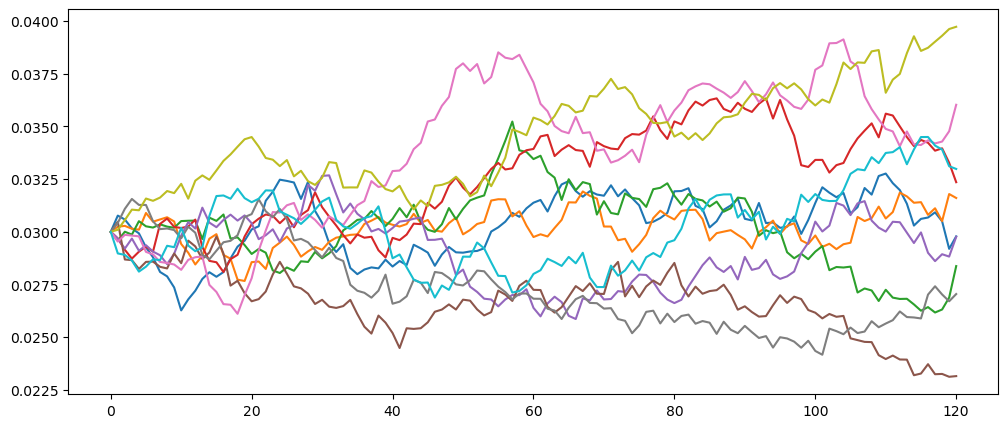

In [13]:
cir(n_scenarios=10, sigma=0.01).plot(figsize=(12,5), legend=False)

In [14]:
def show_cir(r_0 = 0.03, a = 0.5, b = 0.03, sigma = 0.05, n_scenarios = 5):
    cir(r_0 = r_0, a = a, b = b, sigma = sigma, n_scenarios = n_scenarios).plot(figsize=(12,5), legend=False)

controls = widgets.interactive(show_cir,
                               r_0 = (0, 0.15, 0.01),
                               a = (0, 1, 0.1),
                               b = (0, 0.15, 0.01),
                               sigma = (0, 0.1, 0.01),
                               n_scenarios = (1, 100))

display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

### Generating the random price evolution of a Zero-Coupon Bond

(This has been copied from anaconda notebooks_and_codem01_v02/nb/lab_125.ipynb)

The CIR model can also be used to generate the movement of bond prices for a zero coupon bond that are implied by the generated interest rate, using the following equations:

$$P(t,T)=A(t,T)e^{-B(t,T)r_{t}}\!$$

where

$$ A(t,T)=\left({\frac  {2h e^{(a+h)\tau/2}}{2h+(a+h)(e^{\tau h}-1)}}\right)^{{2ab/\sigma ^{2}}} $$

$$ B(t,T)={\frac  {2(e^{\tau h}-1)}{2h+(a+h)(e^{\tau h}-1)}} $$

$$ h={\sqrt  {a^{2}+2\sigma ^{2}}} $$

$$ \tau = T-t $$

- $P(t,T)$: price at time $t$ of a bond that matures at time $T$

So this is the evolution in price of a zero-coupon bond, as interest rates go up, the price of the bond comes down. As interest rates falls, the price of the bond goes up.

In [15]:
import math
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rates evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rate, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year)+1 #because n_years might be a float

    shock = np.random.normal(0, scale = np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    ## For Price Generation
    h = math.sqrt(a**2 + 2*sigma**2)
    prices = np.empty_like(shock)

    def price(ttm, r):
        _A = ((2*h*math.exp((h+a)*ttm/2))/(2*h+(h+a)*(math.exp(h*ttm)-1)))**(2*a*b/sigma**2)
        _B = (2*(math.exp(h*ttm)-1)) / (2*h + (h+a)*(math.exp(h*ttm)-1))
        _P = _A *np.exp(-_B*r)
        return _P
    prices[0] = price(n_years, r_0)

    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
        #generate prices at time t as well...
        prices[step] = price(n_years-step*dt, rates[step])

    rates = pd.DataFrame(data = inst_to_ann(rates), index=range(num_steps))
    prices = pd.DataFrame(data=prices, index=range(num_steps))
    return rates, prices

In [16]:
def show_cir_prices(r_0 = 0.03, a = 0.5, b = 0.03, sigma = 0.05, n_scenarios = 5):
    cir(r_0 = r_0, a = a, b = b, sigma = sigma, n_scenarios = n_scenarios)[1].plot(figsize=(12,5), legend=False)

controls = widgets.interactive(show_cir_prices,
                               r_0 = (0, 0.15, 0.01),
                               a = (0, 1, 0.1),
                               b = (0, 0.15, 0.01),
                               sigma = (0, 0.1, 0.01),
                               n_scenarios = (1, 100))

display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

<Axes: >

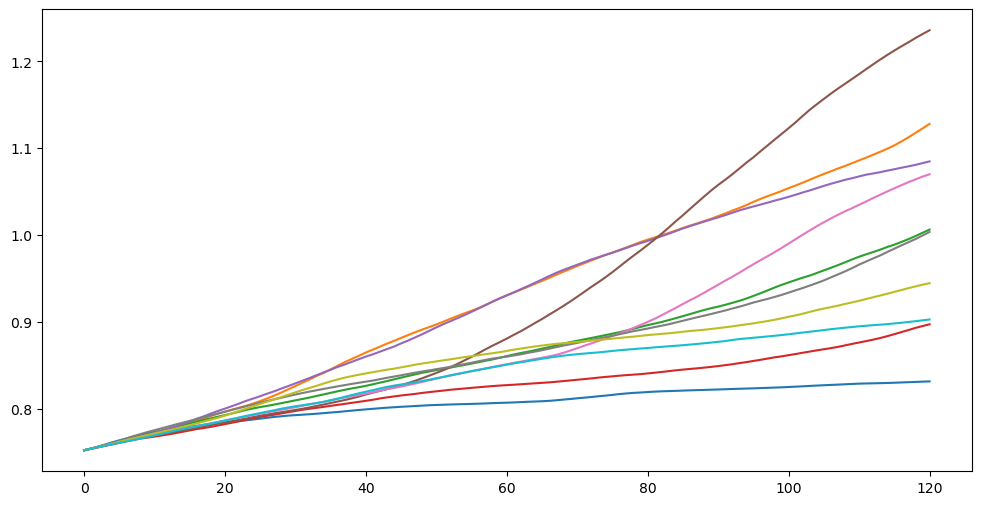

In [17]:
a_0 = 0.75
rates, bond_prices = cir(n_years=10, r_0=0.03, n_scenarios=10, b=0.03)
liabilities = bond_prices
zcbond_10 = pd.Series(data=[1], index=[10])
zc_0 = erk.pv(zcbond_10, r=0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds * bond_prices
av_cash = a_0*(rates/12+1).cumprod()

av_cash.plot(legend=False, figsize=(12,6))

The above looks safe to invest in cash, but then only 4 lines will get back 100% of the money after 120 months. This is not good

<Axes: >

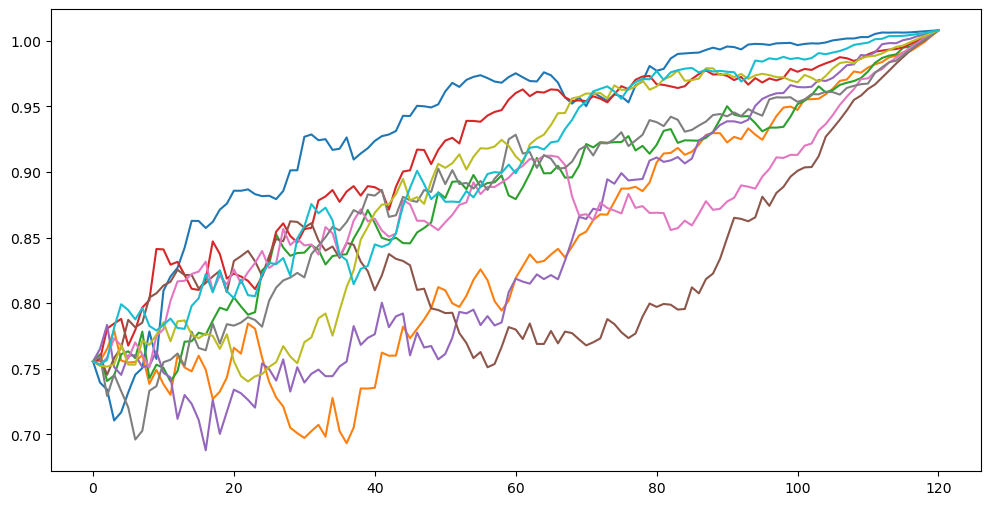

In [18]:
av_zc_bonds.plot(legend=False, figsize=(12,6))

The above zero coupon bonds look super risky, but regardless of interest rates, you will get back 100% of the money after 120 months.

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 scenarios)'}>

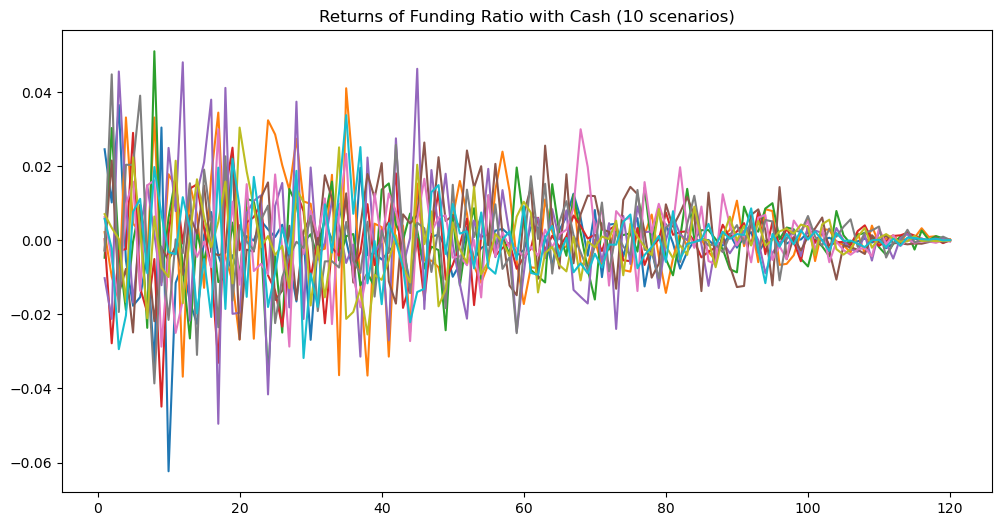

In [19]:
(av_cash/liabilities).pct_change().plot(figsize=(12,6), legend=False, title='Returns of Funding Ratio with Cash (10 scenarios)')

When using cash as an asset, this portfolio is extremely volatile. Quite different from above smooth plot where you think cash is non-risky.
But if you look at the above graph in terms of the funding ratio, it is actually very risky.

<Axes: title={'center': 'Returns of Funding Ratio with Zero Coupon Bond (10 scenarios)'}>

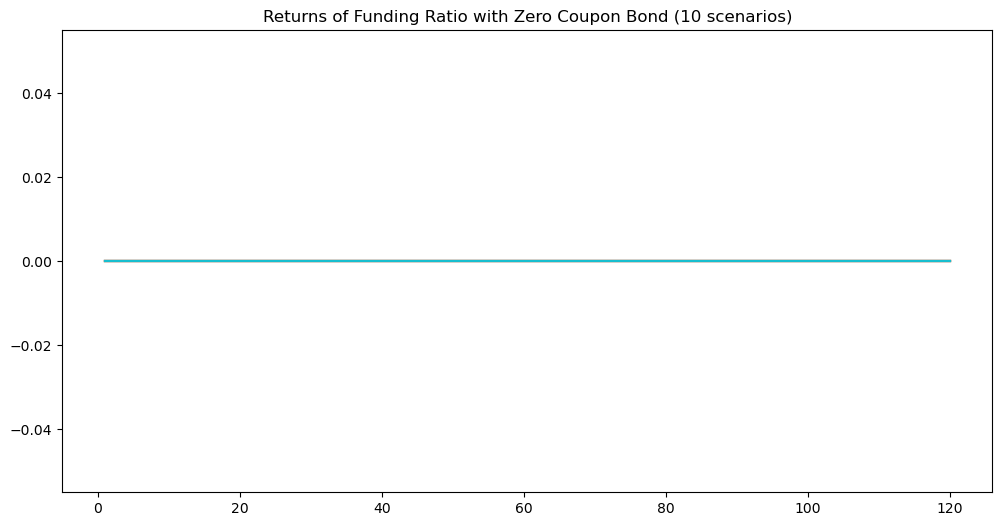

In [20]:
(av_zc_bonds/liabilities).pct_change().plot(figsize=(12,6), legend=False, title='Returns of Funding Ratio with Zero Coupon Bond (10 scenarios)')

From above, we know your funding ratio is steady. You want a fixed reliable funding ratio.
this is the beauty of using zero coupon bonds as your funding vehicle to hedge your liabilities.

However, IRL it gets hard to find exactly the right liability matching set of zero-coupon bonds.
but main benefit is that it is not sensitive to interest rates and you end up where you need to end up.

In [21]:
a_0 = 0.75
rates, bond_prices = cir(r_0=0.03, n_scenarios=10000, b=0.03)
liabilities = bond_prices

zc_0 = erk.pv(zcbond_10, 0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds * bond_prices
av_cash = a_0*(rates/12+1).cumprod()

<Axes: >

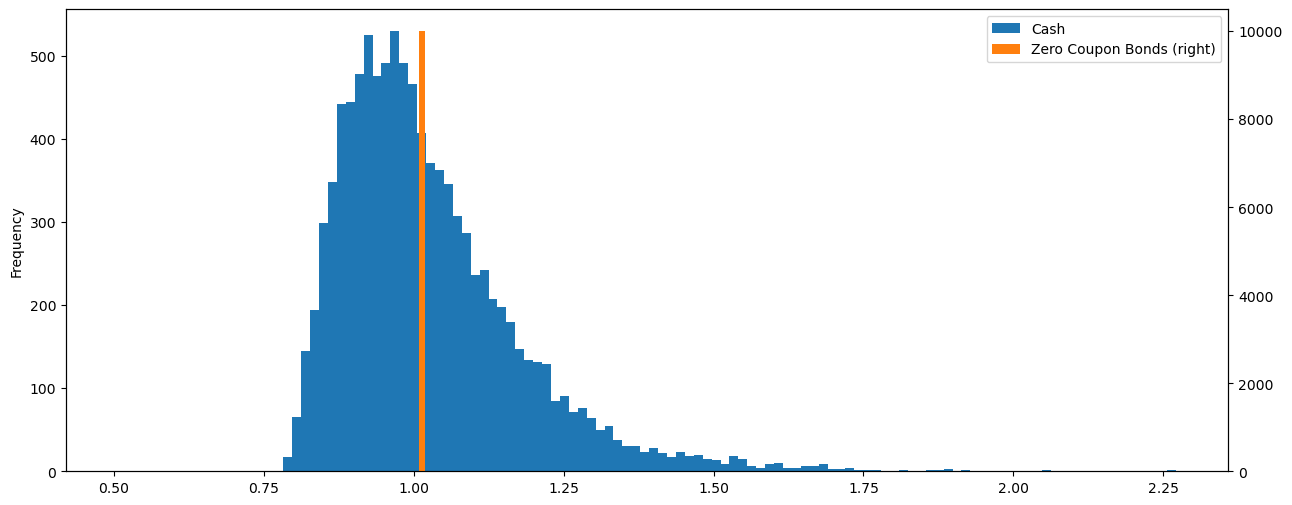

In [22]:
tfr_cash = av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds = av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax = tfr_cash.plot.hist(label='Cash', figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label='Zero Coupon Bonds', bins=100, legend=True, secondary_y=True)

Conclusion: As long as you invest in zero coupon bond and not cash, you will get back orange region. However in cash, there is a possibility you will get back less than original investment (less than orange region).

Now, if the initial amount of cash a_0 = 0.50, and we repeat the following code:
The new orange region tells you you can only get 70% of the 1.0 portion with degree of certainty, but to get 100% of the 1.0 requires investment in cash, which is also risky

<Axes: >

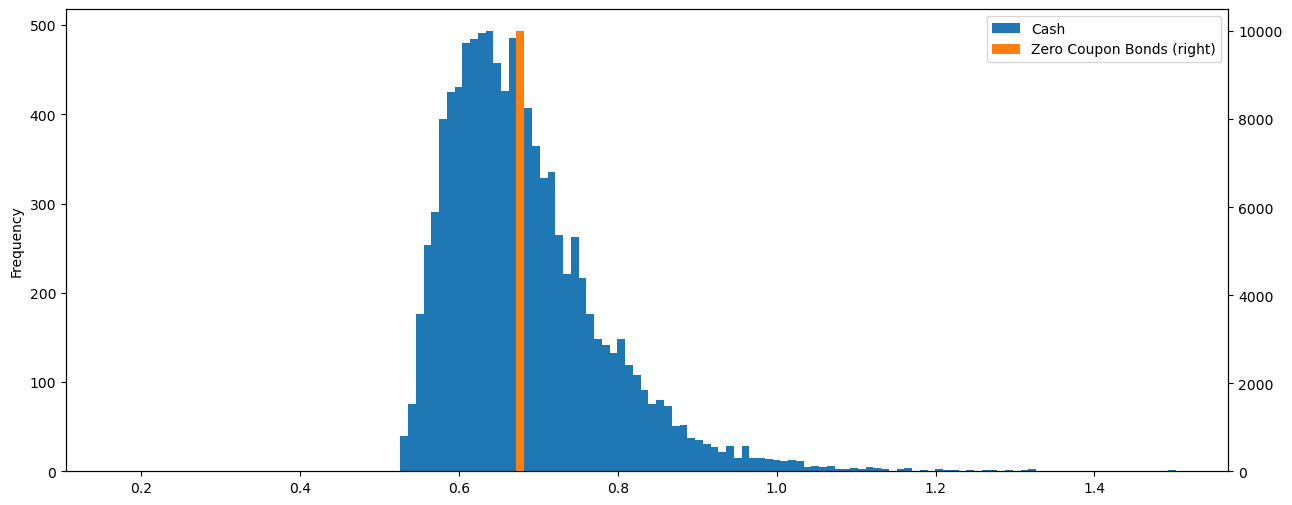

In [23]:
a_0 = 0.50
rates, bond_prices = cir(r_0=0.03, n_scenarios=10000, b=0.03)
liabilities = bond_prices

zc_0 = erk.pv(zcbond_10, 0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds * bond_prices
av_cash = a_0*(rates/12+1).cumprod()

tfr_cash = av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds = av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax = tfr_cash.plot.hist(label='Cash', figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label='Zero Coupon Bonds', bins=100, legend=True, secondary_y=True)

## Video: Liability-driven investing (LDI)
### Greed and Fear
- Performance generation through optimal exposure to rewarded risk factors
- Hedging against unexpected shocks

*Performance-seeking portfolio (PSP)*: focus on diversified efficient access to risk premia.

*Liability-hedging portfolio (LHP)*: focus on hedging impact of risk factors in liabilities.

### Formal LDI model

$$\mathit{max_w} {E[u(\frac{A_T}{L_T})]} \Rightarrow w^{*} = \frac{\lambda_{PSP}}{\gamma \sigma_{PSP}}w^{PSP} + \beta_{L,LHP}(1-\frac{1}{\gamma})w^{LHP}$$

- $\lambda_{PSP}$: the PSP Sharpe ratio: $\lambda=0 \Rightarrow$ no investment in PSP.
- $\beta_{LHP}$: the beta (interest rate??)  of liabilities for LHP: $\beta=0 \Rightarrow$ no investment in LHP.
- $\sigma_{PSP}$ is the PSP volatility: $\sigma=\infty \Rightarrow$ no investment in PSP.
- $\gamma$ is the risk aversion: $\gamma=\infty \Rightarrow$ no investment in PSP.

**Question:** Assume that the best liability-hedging portfolio a pension fund can find has a zero correlation with the liabilities and a 50% Sharpe ratio, and that the highest Sharpe ratio available has a Sharpe ratio of 100%, what should be in this case the optimal allocation to the liability hedging portfolio? 

- 0%
- 50%
- 100%

**Answer:**

- *0%:* Correct 
If the liability-hedging portfolio has no hedging ability, then the pension fund should not hold any of this portfolio since hedging liabilities was the only reason why this portfolio was useful in the first place. 
- *50%:* This should not be selected. 
If the liability-hedging portfolio has no hedging ability, then the pension fund should not hold any of this portfolio since hedging liabilities was the only reason why this portfolio was useful in the first place. 
- *100%:* This should not be selected. 
100% would be in this case the allocation to the performance-seeking portfolio under the simplifying assumption that cash is not used.

In [24]:
erk.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

How does bond price change with interest rates?

In [25]:
erk.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

In [26]:
erk.bond_price(20, 1000, 0.05, 2, 0.05)

1000.0000000000023

In [27]:
erk.bond_price(20, 1000, 0.05, 2, 0.02)

1492.520291709342

In [28]:
rates = np.linspace(0.01, 0.10, num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [29]:
#List comprehension method: Look at bond prices for each of this different interest rates of this bond
prices = [erk.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

<Axes: title={'center': 'Price of 10 year bond with diff interest rates'}>

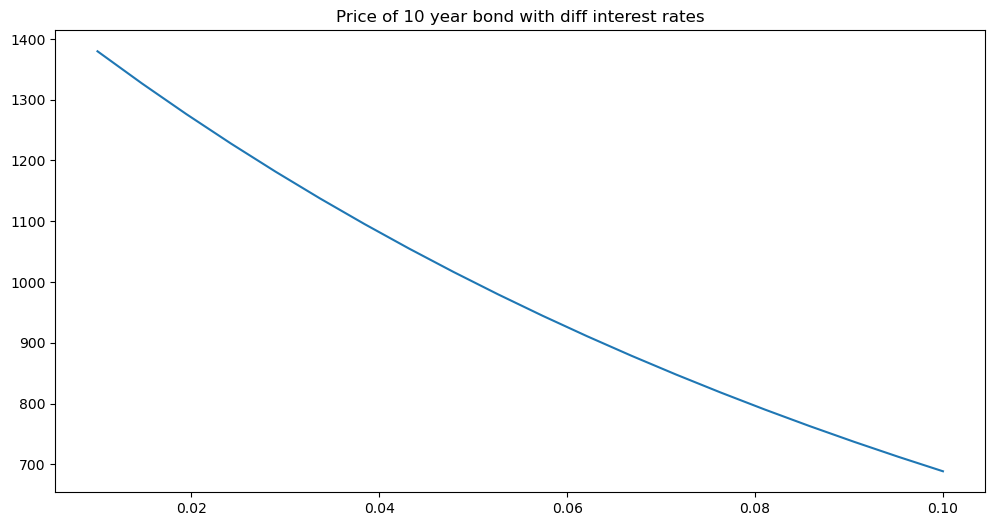

In [30]:
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10 year bond with diff interest rates", legend=False, figsize=(12,6))

As interest rates rise, the price of bonds will fall.

Now we try to construct a combination of bonds that has some sort of resilience to interest rates in much the same way that a zero coupon bond has resilience to interest rates.

In [31]:
cf = erk.bond_cash_flows(3, 1000, 0.06, 2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [32]:
discounts = erk.discount(cf.index, 0.06/2)
discounts

1    0.970874
2    0.942596
3    0.915142
4    0.888487
5    0.862609
6    0.837484
dtype: float64

In [33]:
dcf = discounts * cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [34]:
weights = dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [35]:
# Weighted average of all the periods: Macaulay's formula
(cf.index*weights).sum()

5.579707187194534


### Macaulay duration
The [Macaulay duration](https://www.investopedia.com/terms/m/macaulayduration.asp) is the weighted average term to maturity of the cash flows from a bond. The weight of each cash flow is determined by dividing the *present* value of the cash flow by the price. Macaulay duration is frequently used by portfolio managers who use an immunization strategy.

$$ \mathit{Macaulay\, duration} = \frac{\sum_{t=1}^{n}(\frac{t\times C}{(1+y)^t} +\frac{n\times M}{(1+y)^n} }{\mathit{Current\, bond\, price}}$$

- $t$: respective time period
- $C$: periodic coupon payment
- $y$: periodic yield
- $n$: total number of periods
- $M$: maturity value
- $\mathit{Current\, bond\, price}$: present value of cash flows

In [36]:
erk.macaulay_duration(erk.bond_cash_flows(3, 1000, 0.06, 2), 0.06/2)

5.579707187194534

#### Duration Matching

In [37]:
liabilities = pd.Series(data=[100000, 100000], index=[10, 12])
erk.macaulay_duration(liabilities, 0.04)

10.960799385088393

In [38]:
md_10 = erk.macaulay_duration(erk.bond_cash_flows(10, 1000, 0.05, 1), 0.04)
md_20 = erk.macaulay_duration(erk.bond_cash_flows(20, 1000, 0.05, 1), 0.04)

md_10, md_20

(8.190898824083233, 13.544718122145921)

In [39]:
short_bond = erk.bond_cash_flows(10, 1000, 0.05, 1)
long_bond = erk.bond_cash_flows(20, 1000, 0.05, 1)
w_s = erk.match_durations(liabilities, short_bond, long_bond, 0.04)
w_s

0.48263092069478974

In [40]:
p_short = erk.bond_price(10, 1000, 0.05, 1, 0.04)
p_long = erk.bond_price(20, 1000, 0.05, 1, 0.04)
a_0 = 130000

p_flows = pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long])
erk.macaulay_duration(p_flows, 0.04)

10.960799385088393

In [41]:
erk.macaulay_duration(liabilities, 0.04)

10.960799385088393

In [42]:
# Current funding ratio: Looks very well funded to 100%
cfr = erk.funding_ratio(p_flows, liabilities, 0.04)
cfr

0.9998760012192478

<Axes: title={'center': 'Funding Ratio with changes in interest rates'}>

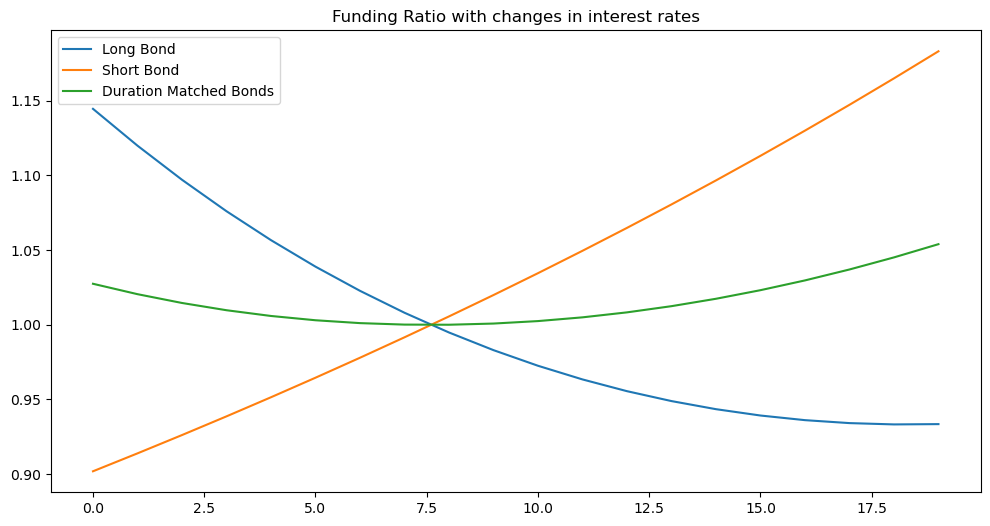

In [43]:
rates = np.linspace(0, 0.1, 20)
lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short

fr_change = pd.DataFrame({
    "Long Bond": [erk.funding_ratio(lb_assets, liabilities, r) for r in rates],
    "Short Bond": [erk.funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds": [erk.funding_ratio(p_flows, liabilities, r) for r in rates]
})

fr_change.plot(title="Funding Ratio with changes in interest rates", figsize=(12,6))

# Week 4 Section 2 -


## Video: Choosing the policy portfolio
### Optimal asset mix

What is the optimal asset mix for liability driven investment ([liability driven investment](#Video:-Lab-Session-Liability-driven-investing)) 
when investing in the two building blocks PSP and LHP ([PSP and LHP](#Greed-and-Fear))?

The risk aversion parameter $\gamma$ is the fraction of allocation to LHP/PSP.

In practice, the allocation to PSP is increased until the risk budget is exhausted. The risk budget is set by the stakeholders.

### Conflicts
There is a conflict between short-term and long-term perspectives. For the long term perspective you want to reach your funding ratio. For the short perspective you want to look at the volatility and the max drawdown ([max drawdown](#Max-drawdown)).

If the risk budget is small, there will not be much upside potential. This requires a large investment to meet the liability.

### Solving the dilemma
- Hide the problem
  - Use a higher discount rate
  - use a higher risk premia value
- Attempt to solve the problem
  - Request a higher contribution
  - Request a higher risk budget
  - Improve the performance seeking portfolio (PSP)

**Question:** What impact do you expect on the shape of the distribution of the final funding ratio when increasing the allocation to performance-seeking assets?

- A decrease in the median value and a decrease in the dispersion of the funding ratio distribution.
- An increase in the median value and a decrease in the dispersion of the funding ratio distribution.
- A decrease in the median value and an increase in the dispersion of the funding ratio distribution.
- An increase in the median value and an increase in the dispersion of the funding ratio distribution.

**Answer:** Increasing the allocation to risk assets increases expected performance and also increases risk. 

**Question:**
At a meeting of the board of trustees of a pension fund, it is decided that the acceptable volatility of the funding ratio is increased from 8% to 10? What consequence should follow?

- An increase in the allocation to the PSP?
- A 10% increase in funding ratio?
- A 10% decrease in funding ratio?
- An increase in the allocation to the LHP?

**Answer:** An increase in the allocation to the PSP. Increasing the risk budget allows investors to take on more risk. 

In [44]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

109.27539294780118

In [45]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [46]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1,2,3]])


1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [47]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1,2,3]])

1    109.810050
2    110.558531
3    106.946493
dtype: float64

In [48]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.028904,0.027380,0.034842
2,0.030739,0.028524,0.035152
3,0.029044,0.027134,0.035403
4,0.031853,0.026807,0.037005


<Axes: >

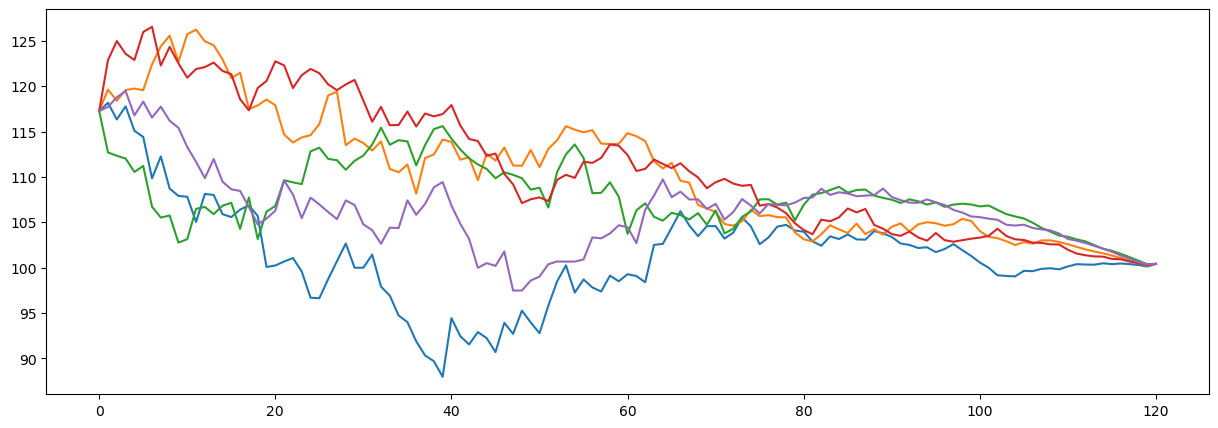

In [49]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

In [50]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices


,1,2,3,4,5
0,117.260292,117.260292,117.260292,117.260292,117.260292
1,118.16978,119.6242,112.694665,122.869762,117.717141
2,116.327604,118.396017,112.329201,124.970658,118.77551
3,117.774958,119.569522,112.020678,123.564856,119.453467
4,115.081025,119.731555,110.546884,122.877268,116.776046
...,...,...,...,...,...
116,100.459249,101.068471,101.525944,100.922983,101.340275
117,100.388655,100.748279,101.154997,100.673302,100.974001
118,100.291268,100.487147,100.76998,100.499081,100.622543
119,100.123294,100.219629,100.375395,100.276769,100.341302


In [51]:
#bond returns
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.001291
2   -0.001291
3   -0.001291
4   -0.001291
5   -0.001291
dtype: float64

In [52]:
#Bond total return = btr, prices = p
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

1     0.00283
2    0.002493
3    0.002573
4    0.002468
dtype: object

In [53]:
#price of 10 year bond
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,100.459249,101.068471,101.525944
117,100.388655,100.748279,101.154997
118,100.291268,100.487147,100.76998
119,100.123294,100.219629,100.375395
120,100.416667,100.416667,100.416667


In [54]:
#price of 30 year bond
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

#the reason the prices at the tail do not converge is because still have maturity left of 20 years to go for the bond, and are going to be haphazard

,1,2,3
116,119.972699,154.840329,189.297826
117,122.788763,149.985617,190.11487
118,125.943487,148.281981,189.734359
119,121.35191,142.207781,186.1508
120,120.12513,143.571285,188.59264


In [55]:
#construct new portfolio of 60-40mix of the 10 year and 30 year bonds: Assuming rebalancing back to 60-40 at every end of month
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = 0.6*rets_10 + 0.4*rets_30

In [56]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fischer VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.002921,0.003538,0.183138,2.581066,-0.001294,-0.000901,0.128559,0.0


In [57]:
#price of equities
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [58]:
#returns of equities
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [59]:
rets_bonds.shape

(120, 500)

In [60]:
#overall returns example
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fischer VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.004867,0.004649,-0.052404,3.201583,-0.002655,-0.002033,0.516372,0.0


## Video: Beyond LDI
### Lab Session-Naive risk budgeting between the PSP & GHP

### Fund separation theorem
The LDI paradigm ([LDI](#Video:-Liability-driven-investing-(LDI))) uses two building blocks as described by the [Fund separation theory](https://en.wikipedia.org/wiki/Mutual_fund_separation_theorem) for performance seeking and liability hedging.

### Fund interaction 'theorem'
The Fund interaction 'theorem' tries to combine a high funding ratio with a low level of uncertainty. This maximizes investor welfare.
Investor welfare consists of:
- pure performance contribution (high sharpe ratio)
- pure hedging contribution (meeting the liability)
- cross-contribution performance/hedging (maximizing the correlation between PSP and the liabilities)

**Question:** What is the contribution of the performance-seeking portfolio to investor welfare if risk-aversion is infinite?

- 0%
- 100%
- We need to know what is the Sharpe ratio of the PSP to answer this question?

**Answer:** An investor with infinite risk-aversion would optimally hold 0% of the PSP even if the PSP has an attractive Sharpe ratio. As a result the PSP will not contribute to the welfare of this investor. 

### Fund separation/interaction in practice

Improve liability friendliness of PSP $\rightarrow$ 
- one can allocate more money to PSP for the same risk budget.
- a lower performance may be generated by PSP.

**Question:** Would the adoption of a more defensive equity benchmark lead to:

- An increase in investor welfare?
- A decrease in investor welfare?
- An impact on investor welfare that can be positive or negative depending on parameter values? 

**Answer:** Adopting a more defensive equity benchmark would lead to a decrease in funding ratio volatility, which in turns would allow for an increase in equity allocation for the same risk budget, but it would also lead to a decrease in performance. The impact on investor welfare will be negative if the decrease in performance will more than compensate for the increase in equity exposure.  in performance. The impact on investor welfare will be positive if the increase in equity exposure will more than compensate for the decrease in performance.  

In [61]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator=erk.fixedmix_allocator, w1=0.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fischer VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.00297,0.004063,0.07105,3.219926,-0.001078,-0.000505,0.123883,-0.00012


In [62]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [63]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis=1)
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fischer VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.004545,0.004764,0.024819,2.630342,-0.002293,-0.001884,0.436326,0.0


In [64]:
summaries = erk.summary_stats(pd.DataFrame(rets_7030b))
summaries

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fischer VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.006205,0.118334,-0.072819,2.998144,0.049874,0.064017,0.031584,-0.188954
1,0.007367,0.108958,-0.027182,2.363083,0.044310,0.055512,0.044967,-0.123862
2,0.005481,0.117787,0.232944,2.715185,0.047564,0.058588,0.025587,-0.243286
3,0.006853,0.101878,-0.011321,3.515807,0.040683,0.055842,0.043047,-0.100069
4,0.002408,0.121036,0.309988,3.160154,0.050982,0.062317,-0.000494,-0.209338
...,...,...,...,...,...,...,...,...
495,0.007767,0.111887,-0.091347,3.228810,0.045305,0.062856,0.047365,-0.216152
496,0.006909,0.109019,-0.038046,2.716101,0.044669,0.056710,0.040744,-0.123448
497,0.003150,0.106815,-0.117337,3.114091,0.047831,0.061927,0.006390,-0.184540
498,0.001221,0.108284,0.299623,3.135630,0.046710,0.056406,-0.011508,-0.257436


In [65]:
summaries.mean()

Annualized Return           0.004069
Annualized Vol              0.107445
Skewness                   -0.004535
Kurtosis                    2.947803
Cornish-Fischer VaR (5%)    0.046300
Historic CVaR (5%)          0.058625
Sharpe Ratio                0.015066
Max Drawdown               -0.213492
dtype: float64

In [66]:
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30")
], axis=1)

,FI,Eq,70/30
mean,4.575037,12.895960,9.591443
std,2.907749,12.564405,7.139172
p_breach,NaN,NaN,NaN
p_reach,NaN,NaN,NaN
e_short,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


C:\Users\acer\AppData\Local\Temp\ipykernel_88816\597959081.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(erk.terminal_values(rets_eq), color="red", label="100% Equities")
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\AppData\Local\Temp\ipykernel_88816\597959081.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a

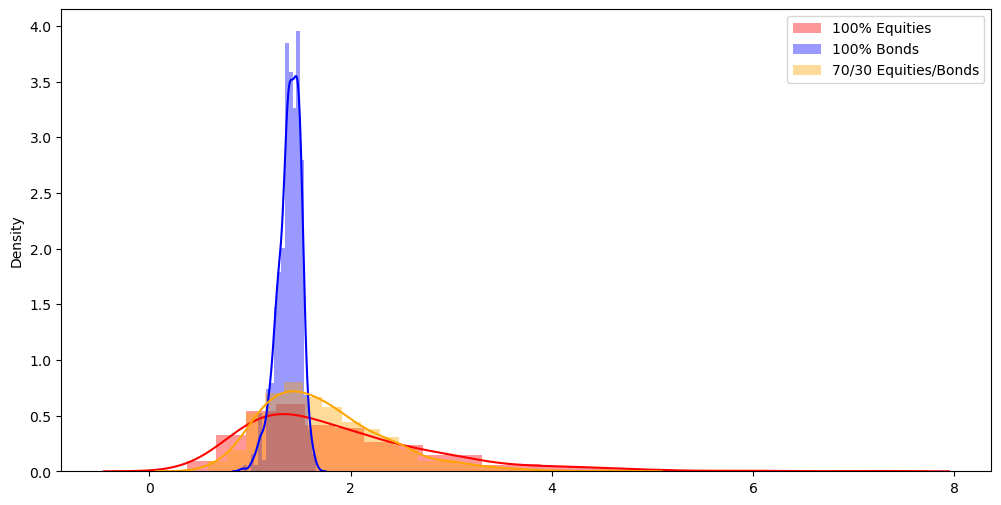

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.distplot(erk.terminal_values(rets_eq), color="red", label="100% Equities")
sns.distplot(erk.terminal_values(rets_bonds), color="blue", label="100% Bonds")
sns.distplot(erk.terminal_values(rets_7030b), color="orange", label="70/30 Equities/Bonds")
plt.legend()
plt.show()

#### Glide paths for Allocation

In [68]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.glidepath_allocator, start_glide=0.8, end_glide=0.2)
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30"),
    erk.terminal_stats(rets_g8020, name="Glide 80 to 20")
], axis=1)

,FI,Eq,70/30,Glide 80 to 20
mean,4.575037,12.895960,9.591443,7.673741
std,2.907749,12.564405,7.139172,5.412735
p_breach,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN
e_short,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


## Video: Liability-friendly equity portfolios
### Liability friendliness
- cash-flow matching focus: choose stocks with high and stable dividends
- factor matching focus: choose stocks that may have a low tracking error with respect to the liabilities: low volatility stocks
- isovariance portfolios: fill the risk budget upto the the allowed level with low volatility stocks.

In [69]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios, b=0.03, r_0=0.03, sigma=0.02)
price_eq = erk.gbm(n_years=10, n_scenarios=n_scenarios, mu=0.07, sigma=0.15)

In [70]:
rets_zc = zc_prices.pct_change().dropna()
rets_eq = price_eq.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=0.7)
pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75)
], axis=1).round(2)

,ZC,Eq,70/30
mean,235099.80,4.983155e+11,9.279893e+09
std,86424.27,2.275328e+12,2.757565e+10
p_breach,NaN,NaN,NaN
p_reach,NaN,NaN,NaN
e_short,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [71]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=0.75, zc_prices = zc_prices[1:])
pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75)
    ],
    axis=1).round(2)

,ZC,Eq,70/30,Floor75
mean,235099.80,4.983155e+11,9.279893e+09,2.158660e+11
std,86424.27,2.275328e+12,2.757565e+10,8.045848e+11
p_breach,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN
e_short,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [72]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=0.75, zc_prices = zc_prices[1:], m=1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=0.75, zc_prices = zc_prices[1:], m=5)

pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
    erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75), 
    erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75)
    ],
    axis=1).round(2)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5
mean,235099.80,4.983155e+11,9.279893e+09,2.158660e+11,3.816380e+08,2.789978e+11
std,86424.27,2.275328e+12,2.757565e+10,8.045848e+11,7.170014e+08,1.101906e+12
p_breach,NaN,NaN,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_short,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


#### Risk Budgeting with Drawdown Constraint

In [73]:
cashrate = 0.02
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data = monthly_cashreturn, index = rets_eq.index, columns = rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.drawdown_allocator, maxdd=0.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
    erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75), 
    erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
    erk.terminal_stats(rets_maxdd25, name="MaxDD25", floor=0.75),
    ],
    axis=1).round(4)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,MaxDD25
mean,235099.7986,4.983155e+11,9.279893e+09,2.158660e+11,3.816380e+08,2.789978e+11,3.653118e+09
std,86424.2688,2.275328e+12,2.757565e+10,8.045848e+11,7.170014e+08,1.101906e+12,1.724249e+10
p_breach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_short,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].head()

0   -0.121673
1   -0.176106
2   -0.116889
3   -0.161497
4   -0.126920
Name: Max Drawdown, dtype: float64

In [76]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.24828983918130468

C:\Users\acer\AppData\Local\Temp\ipykernel_88816\3333765724.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\AppData\Local\Temp\ipykernel_88816\3333765724.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

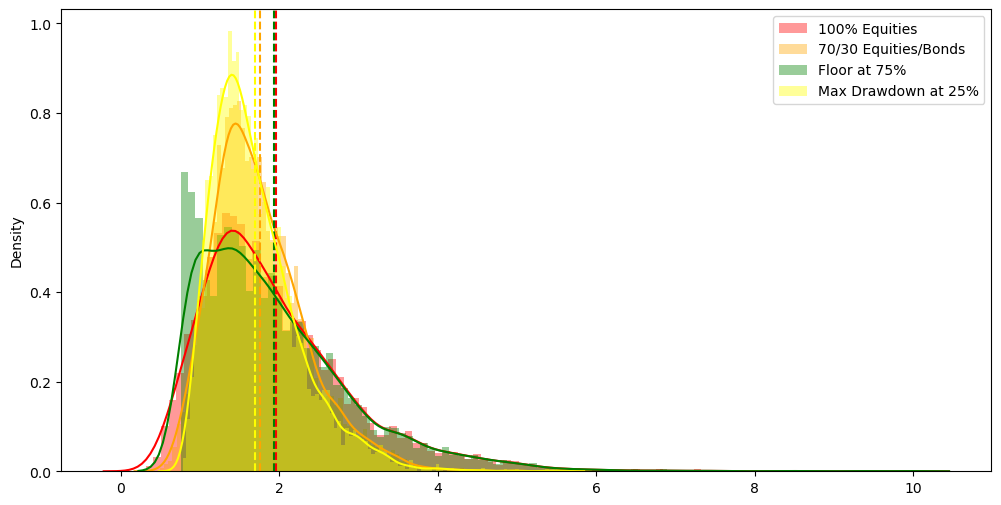

In [78]:
tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

#Plot
plt.figure(figsize=(12, 6))
sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
plt.axvline(tv_eq.mean(), color="red", ls="--")

sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
plt.axvline(tv_7030b.mean(), color="orange", ls="--")

sns.distplot(tv_floor75, color="green", label="Floor at 75%", bins=100)
plt.axvline(tv_floor75.mean(), color="green", ls="--")

sns.distplot(tv_maxdd25, color="yellow", label="Max Drawdown at 25%", bins=100)
plt.axvline(tv_maxdd25.mean(), color="yellow", ls="--")

plt.legend()
plt.show()

#### Drawdown Constraint with Historical Data

<Axes: >

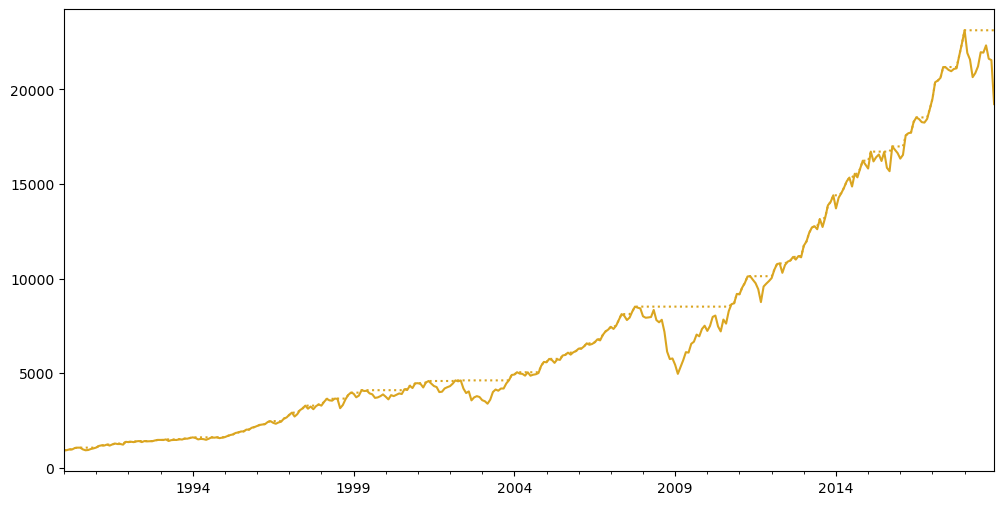

In [87]:
rets_tmi = erk.get_total_market_index_returns()["1990":]
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12, 6), color="goldenrod")
dd_tmi["Peaks"].plot(ax=ax, ls=":", color="goldenrod")

In [ ]:
#Convert rets_tmi to a data frame from series
rets_tmi = pd.DataFrame(rets_tmi, columns=[0])
print(rets_tmi.shape, rets_cash.shape)


(348, 1) (348, 1)


<Axes: >

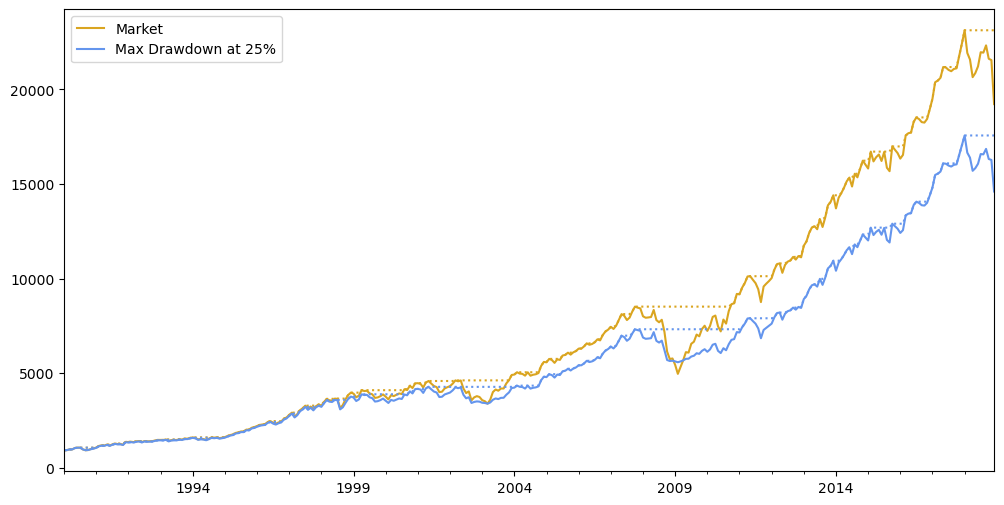

In [90]:
cashrate = 0.03
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data = monthly_cashreturn, index = rets_tmi.index, columns = [0]) #1 column data frame
rets_maxdd25 = erk.bt_mix(rets_tmi, rets_cash, allocator=erk.drawdown_allocator, maxdd=0.25, m=5)
dd_25 = erk.drawdown(rets_maxdd25[0])

ax = dd_tmi["Wealth"].plot(figsize=(12, 6), color="goldenrod", label="Market", legend=True)
dd_tmi["Peaks"].plot(ax=ax, ls=":", color="goldenrod")
dd_25["Wealth"].plot(ax=ax, color="cornflowerblue", label="Max Drawdown at 25%", legend=True)
dd_25["Peaks"].plot(ax=ax, ls=":", color="cornflowerblue")

In [95]:
erk.summary_stats(pd.concat([
    rets_tmi.rename(columns={rets_tmi.columns[0]: "Market"}),  # Rename the column in rets_tmi
    pd.DataFrame(rets_maxdd25[0]).rename(columns={0: "Max Drawdown at 25%"})  # Convert Series to DataFrame and rename
], axis=1))


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fischer VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Market,0.008531,0.132007,-0.569988,4.432231,0.058163,0.083891,0.045929,-0.417466
Max Drawdown at 25%,0.007734,0.115189,-0.583697,4.438866,0.050660,0.073085,0.045722,-0.238371


Need to debug, very little returns.